In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Adidas Vs Nike.csv")

In [3]:
df.rename(columns = {"Brand":"Line"},inplace=True)
df["Brand"] = df["Line"].apply(lambda x: "Adidas" if "Adidas" in x else "Nike")
df = df.loc[df['Reviews'] != 0]


In [13]:
# Make the top 5 most and least profitable (Sale - Listing) shoes for both brands
df["Profit"]  = np.subtract(df["Sale Price"],df["Listing Price"])
df[(df["Brand"] == "Adidas")].sort_values(by=["Rating","Reviews"],ascending=False).head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Line,Description,Rating,Reviews,Last Visited,Brand,Profit
267,Men's adidas Toe Side II Slippers,CM0070,1299,779,40,Adidas CORE / NEO,The adidas casual slippers for men with a stri...,5.0,99,2020-04-13T15:06:28,Adidas,-520
1800,Men's adidas Running Asweego Shoes,F35560,7999,3999,50,Adidas CORE / NEO,Shoes with flexibility and responsiveness for ...,5.0,99,2020-04-13T15:07:28,Adidas,-4000
1849,MEN'S ADIDAS RUNNING NAYO 2.0 SHOES,CJ7975,5299,2649,50,Adidas CORE / NEO,The stylish adidas Nayo 2.0 shoes for men craf...,5.0,97,2020-04-13T15:07:29,Adidas,-2650
1039,Men's adidas Sport Inspired Court Adapt Shoes,F36417,5999,4199,30,Adidas CORE / NEO,These tennis-inspired shoes elevate their styl...,5.0,96,2020-04-13T15:06:56,Adidas,-1800
2505,Men's adidas Originals Liberty Cup Shoes,EE6111,7599,4559,40,Adidas ORIGINALS,Late-'90s tennis style broke with everything t...,5.0,94,2020-04-13T15:07:55,Adidas,-3040
731,WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEKNIT SHOES,B96508,11999,5999,50,Adidas ORIGINALS,"With a playful and eclectic look, the Arkyn sh...",5.0,92,2020-04-13T15:06:44,Adidas,-6000
1476,Men's adidas Originals Superstar MG Shoes,FV3029,7999,7999,0,Adidas ORIGINALS,"An icon for half a century, the adidas Superst...",5.0,90,2020-04-13T15:07:12,Adidas,0
1049,Men's adidas Running Norad Shoes,CK9456,4999,2499,50,Adidas CORE / NEO,These men's running shoes keep you comfortable...,5.0,89,2020-04-13T15:06:56,Adidas,-2500
1972,Men's adidas Sport Inspired Lite Racer RBN Shoes,EG4009,5999,5999,0,Adidas CORE / NEO,The spirit of speed combined with comfort and ...,5.0,89,2020-04-13T15:07:35,Adidas,0
523,Women's adidas Originals SL Andridge Shoes,EF5549,8599,8599,0,Adidas ORIGINALS,"'70s flair, meet modern style. These adidas SL...",5.0,79,2020-04-13T15:06:37,Adidas,0


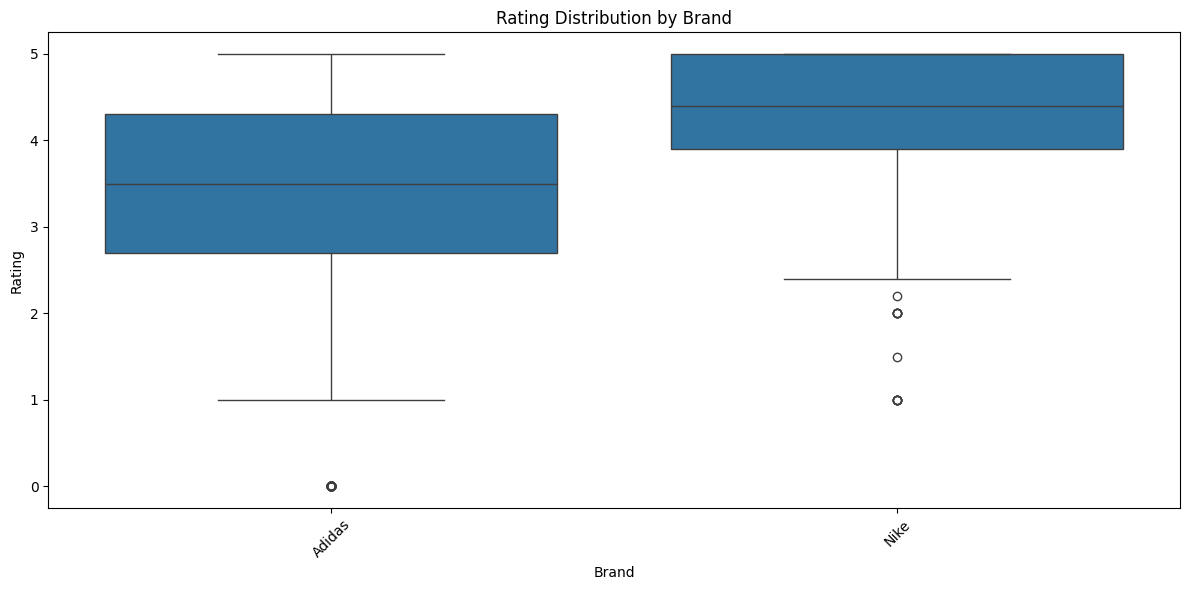

In [7]:
# 1. Brand Distribution and Average Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Rating', data=df)
plt.title('Rating Distribution by Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

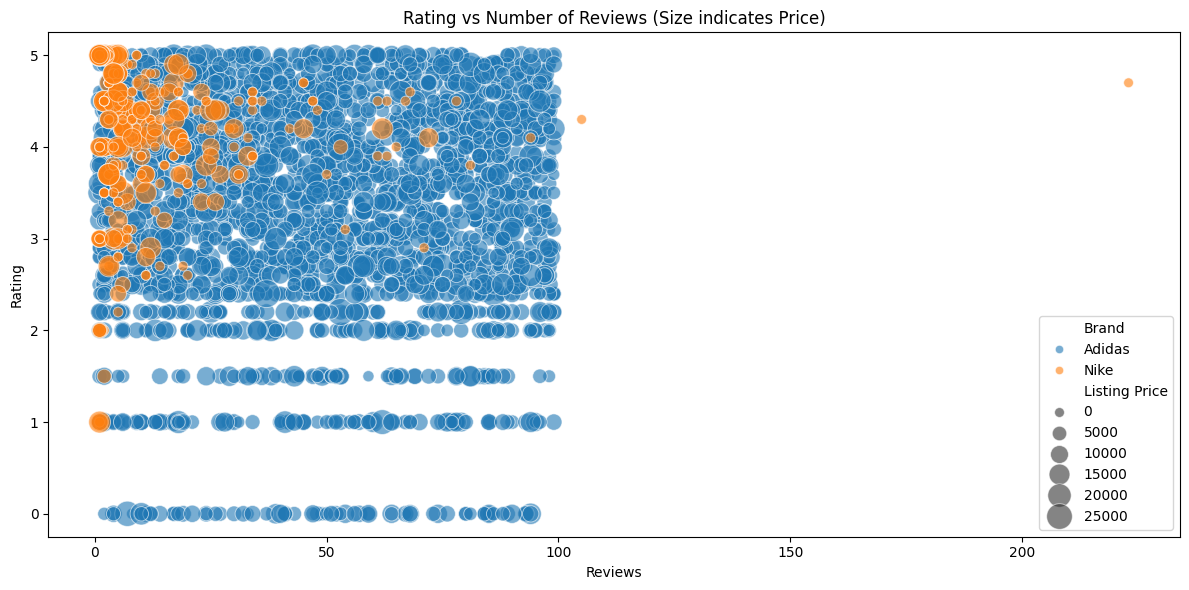

In [20]:
# 3. Reviews vs Rating Analysis with Brand distinction
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating', hue='Brand', size='Listing Price', 
                sizes=(50, 400), alpha=0.6)
plt.title('Rating vs Number of Reviews (Size indicates Price)')
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_21452\1909875569.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand', y='Listing Price', data=df, ci=None)


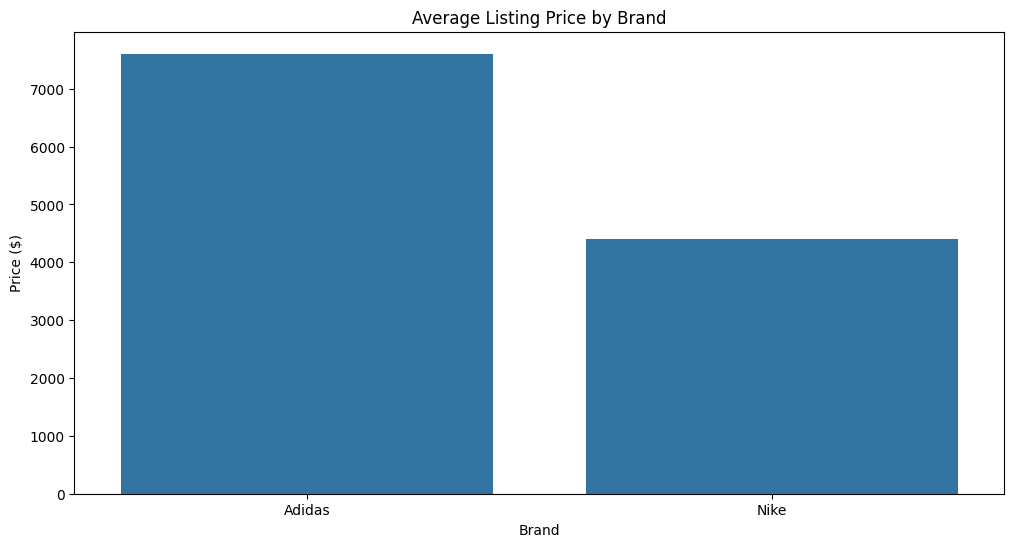

In [21]:
# 3. Average Price Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Listing Price', data=df, ci=None)
plt.title('Average Listing Price by Brand')
plt.ylabel('Price ($)')
plt.show()